# Lab 9: Clustering 

In this lab, you will gain more experience with clustering. In particular, you will learn how to use two of the most popular clustering algorithms: Hierarchical Clustering and K-Means Clustering. Then, you will be asked to apply this knowledge on a document data set.

## Lab 9.A: Clustering Tutorial with Questions (50% of grade)

Let us start by importing the needed libraries. We will use sklearn library, which implements many of the most popular data science algorithms. We will be using this library often for the rest of this course. Please, take a moment to look at the sklearn documentation at: http://scikit-learn.org/stable/.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from pandas import crosstab
from pandas.plotting import scatter_matrix
import pandas as pd
%matplotlib inline

Let us load the Iris data set and plot a scatter plot of the 2nd and 3rd attributes.

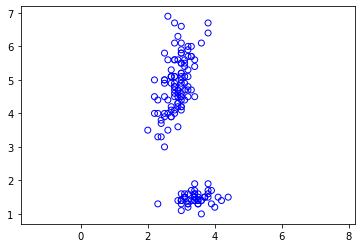

In [2]:
iris = datasets.load_iris()
d = iris.data
y = iris.target

plt.scatter(d[:,1],d[:,2],facecolors='none',color='blue')
plt.axis('equal');

## Hierarchical Clustering
Let us run the **hierarchical clustering** on the 2 columns of Iris. We will use only the first 20 rows. We'll call this new data set `dnew`.

In [3]:
A=range(0,20)
dnew = d[A,1:3]
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'single', metric = 'euclidean')
# Picks 2 clusters
cl = hierarchy.fcluster(Z, 2, criterion='maxclust')

Let us now plot the dendrogram. 

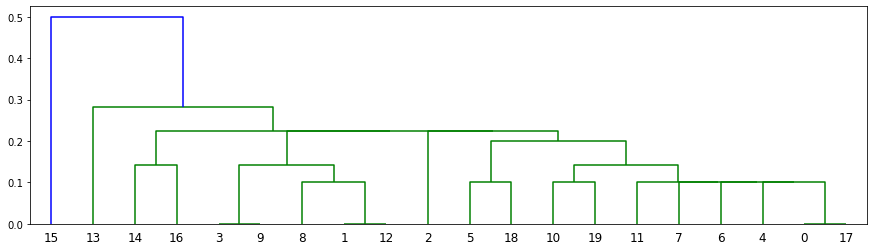

In [14]:
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z);

And, let us see the outcome of clustering

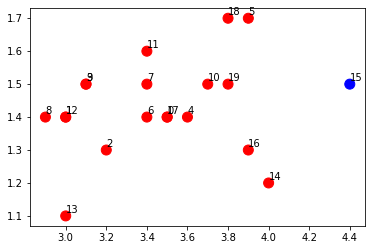

In [15]:
plt.figure()
colors=['red','blue']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

**Question 1**: Let us play with the clustering options
- Make 3 clusters. Discuss the result
- Use several different methods, other than 'single'. Try 'average' and one more of your choice. Discuss the result.
- Use a metric other than 'Eucliedean'. Discuss the result.

In [3]:
def try_and_display_clustering(data, test_method='single', test_metric='euclidean', num_clusters= 3):
    print(num_clusters, " clusters with method ", test_method, " and distance metric ", test_metric)

    Z_prime = hierarchy.linkage(data,method = test_method, metric = test_metric)
    clustering_n = hierarchy.fcluster(Z_prime, num_clusters, criterion="maxclust")

    plt.figure(figsize = (15,4))
    hierarchy.dendrogram(Z_prime);

    plt.figure()
    colors=['red','blue', 'green', 'yellow', 'orange', 'cyan', 'purple', 'black', 'pink', 'brown']
    plt.scatter(data[:,0],data[:,1],c=clustering_n, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
    for i in range(data.shape[0]):
        plt.text(data[i,0],data[i,1]+0.01,s=str(i),size=10)

    return Z_prime, clustering_n

3  clusters with method  single  and distance metric  euclidean


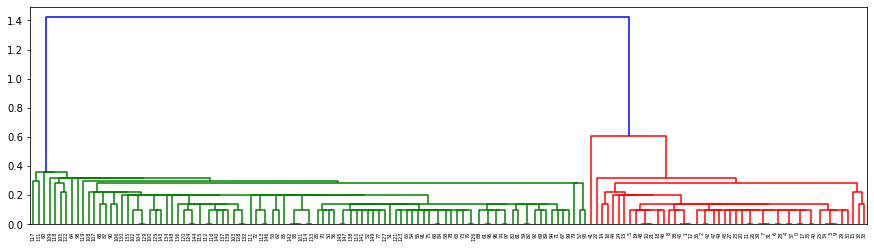

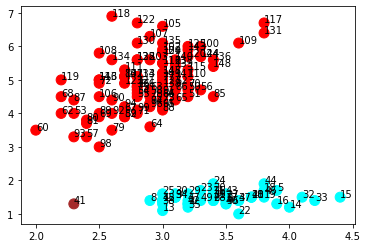

In [60]:
try_and_display_clustering(dnew)

The hierarchical clustering algorithm just identified what looks like another outlier as a 3rd cluster.

3  clusters with method  average  and distance metric  euclidean


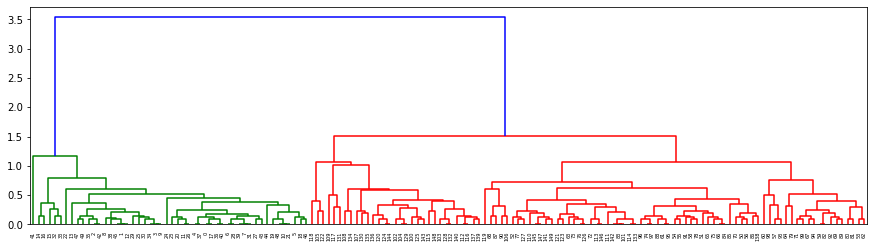

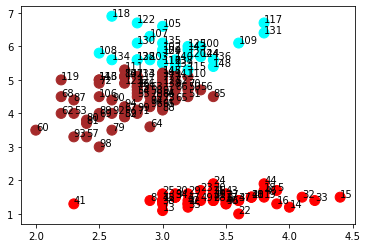

In [61]:
try_and_display_clustering(dnew, "average")

3  clusters with method  weighted  and distance metric  euclidean


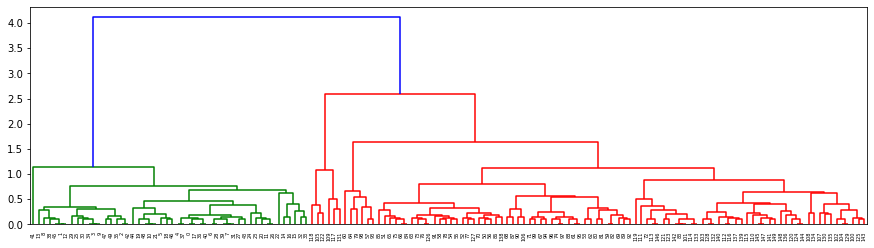

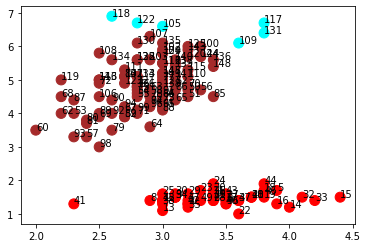

In [62]:
try_and_display_clustering(dnew, "weighted")

3  clusters with method  complete  and distance metric  euclidean


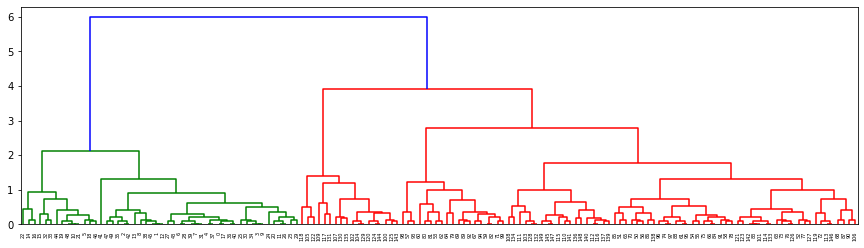

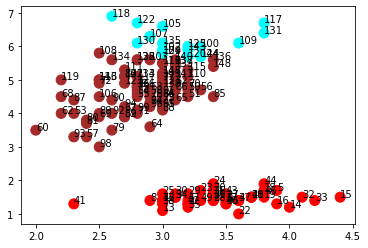

In [63]:
try_and_display_clustering(dnew, "complete")

Average and weighted methods produced the same relatively more sensible division into 3 clusters.
Meanwhile, the complete method split off cases which seem to belong with the main part of the upper cluster to enlarge the fringe third cluster at the top.

3  clusters with method  average  and distance metric  chebyshev


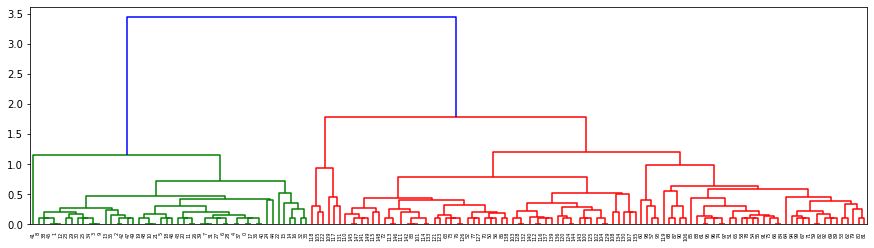

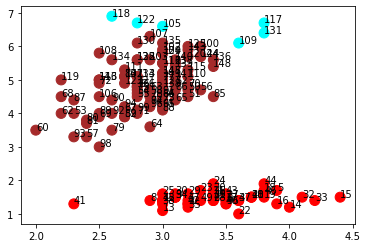

In [64]:
try_and_display_clustering(dnew, "average", "chebyshev")

3  clusters with method  average  and distance metric  jaccard


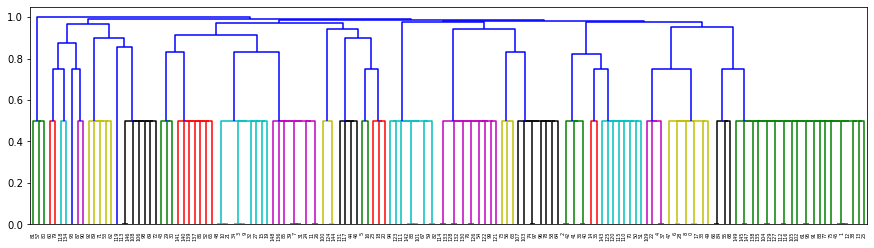

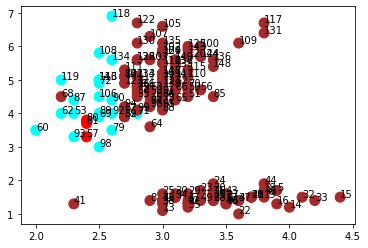

In [65]:
try_and_display_clustering(dnew, "average", 'jaccard')

3  clusters with method  average  and distance metric  correlation


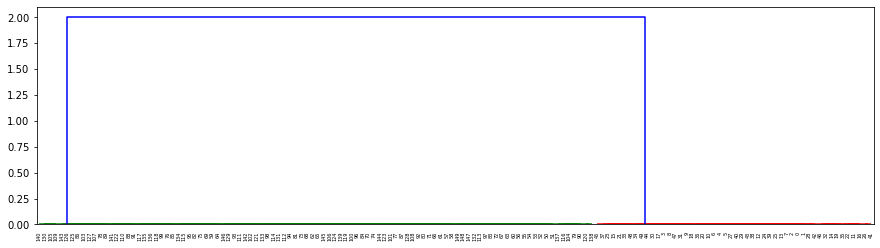

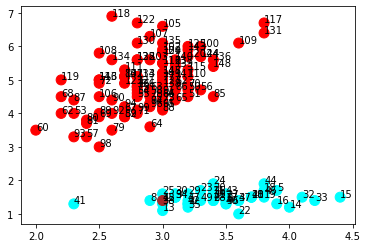

In [67]:
try_and_display_clustering(dnew, "average", "correlation")

The chebyshev distance metric did pretty much the same thing as Euclidean. 
Meanwhile, the jaccard metric cut across the visible clusters in an utterly bizarre fashion.
Also, the correlation metric reasonably split the upper and lower clusters but then strangely selected a single point in the middle of the lower visible cluster as its third cluster



**Question 2**. Run the clustering on the whole Iris data set, using only 2nd and 3rd columns. Plot the results. Try to figure out which is the best number of clusters.

2  clusters with method  weighted  and distance metric  euclidean
3  clusters with method  weighted  and distance metric  euclidean
4  clusters with method  weighted  and distance metric  euclidean
5  clusters with method  weighted  and distance metric  euclidean
6  clusters with method  weighted  and distance metric  euclidean
7  clusters with method  weighted  and distance metric  euclidean
8  clusters with method  weighted  and distance metric  euclidean
9  clusters with method  weighted  and distance metric  euclidean


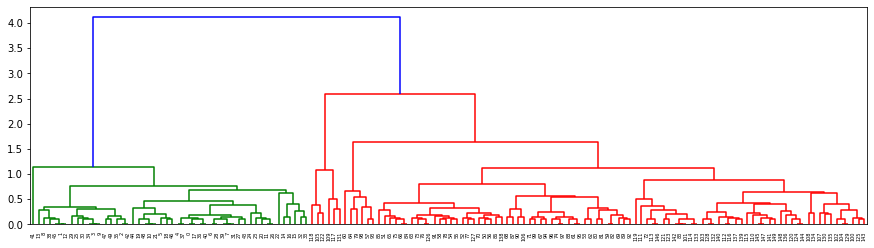

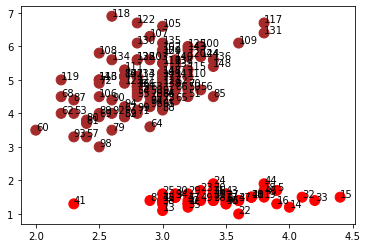

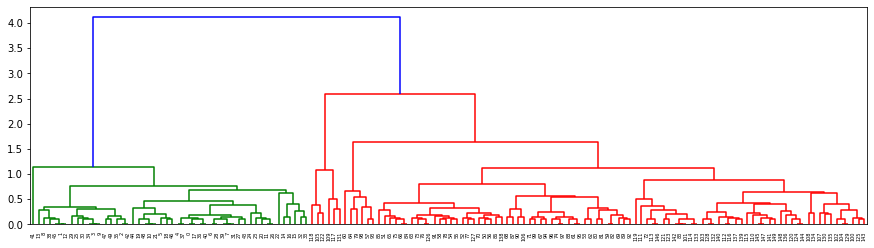

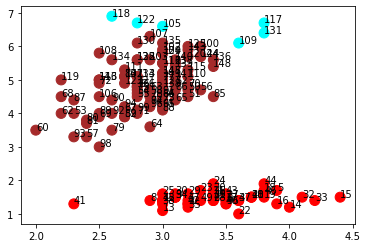

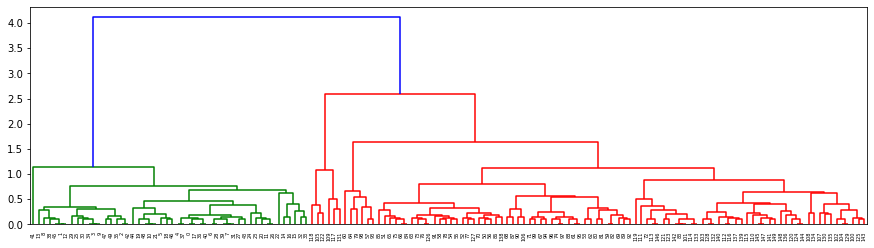

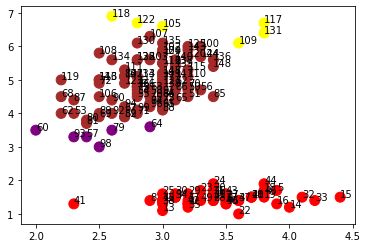

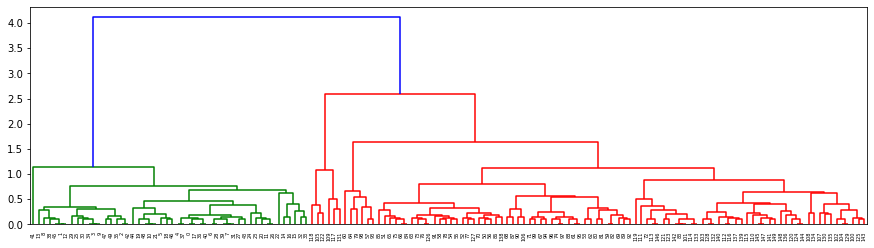

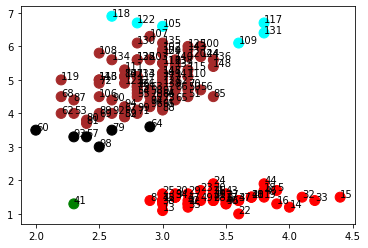

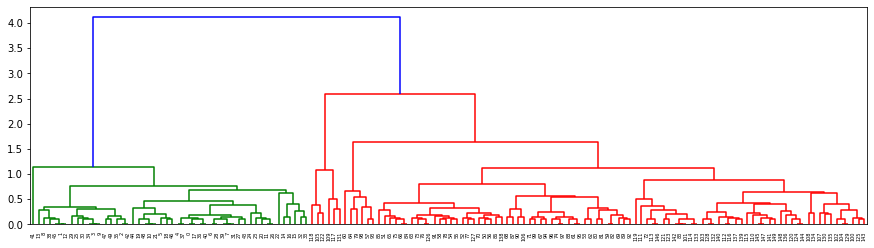

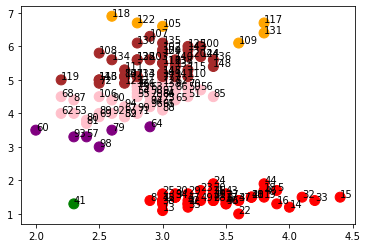

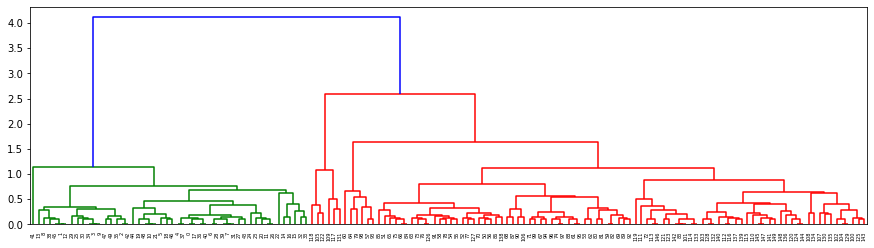

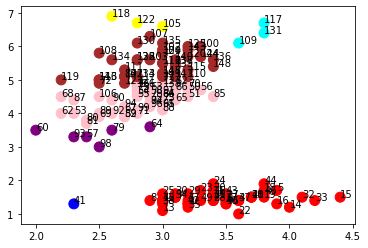

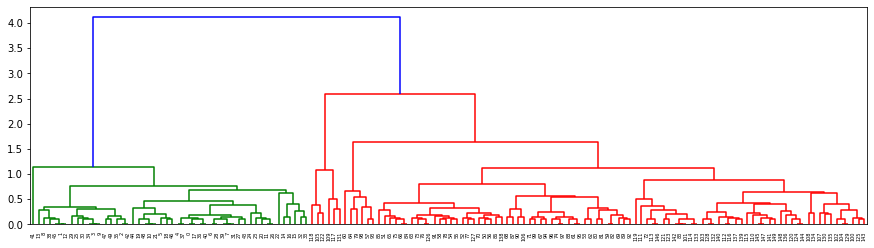

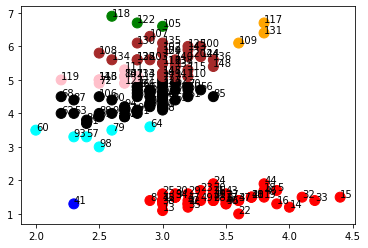

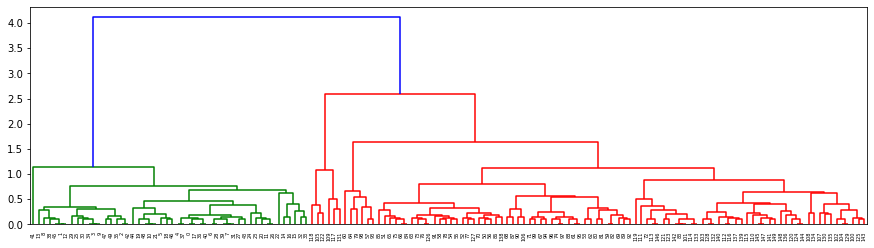

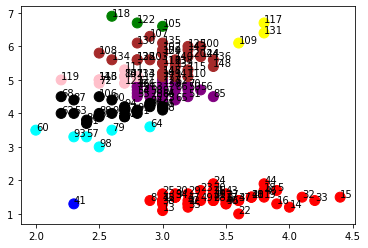

In [57]:
full_2col_iris= d[:, 1:3]
for cluster_count in range(2, 10):
    try_and_display_clustering(full_2col_iris, test_method="weighted", num_clusters=cluster_count)


I think the best split is with 3 clusters here, because adding a 4th cluster splits the lower end of the upper group of points off, which doesn't make much sense to me.

Each of the 150 flowers in Iris data set is labeled as one of 3 types of Irises. This information is in your variable `y`. Let us look at the cross-tabulation between the found clusters and the type of a flower:

In [6]:
dnew = d[:,1:3]
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
# Picks 2 clusters
cl = hierarchy.fcluster(Z, 2, criterion='maxclust')
print(crosstab(cl, y, rownames=['cl'], colnames=['y']))

y    0   1   2
cl            
1   50   0   0
2    0  50  50


**Question 3**. Discuss the cross-tabulation result. Do you think clustering did a good job?

The first category is correctly split off into its own cluster.
However, the third category of flowers are lumped into the same cluster with the flowers of the second category.
I don't think this is an especially great clustering.

**Question 4**. Repeat the clustering, but this time find 3 clusters. Chack the cross-tabulate and discuss if you are happy with the result. Try with 4 and 5 clusters.

3  clusters with method  average  and distance metric  euclidean
y    0   1   2
cl            
1   50   0   0
2    0   0  31
3    0  50  19


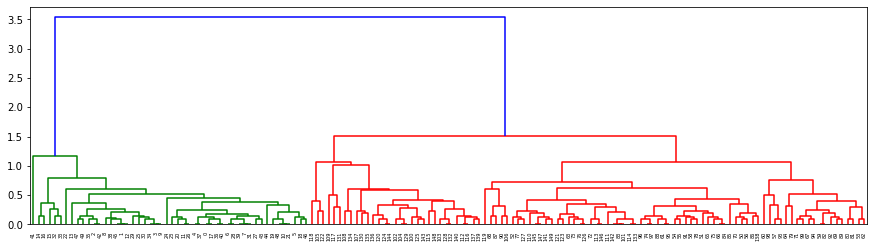

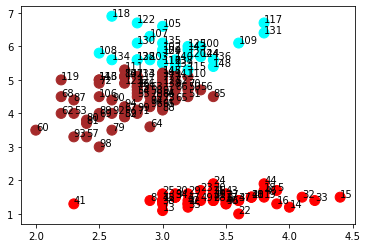

In [5]:
Znew, cluster_new = try_and_display_clustering(dnew, "average", num_clusters=3)
print(crosstab(cluster_new, y, rownames=['cl'], colnames=['y']))

The first category is correctly split off into its own cluster.
Also, all of the second category of flowers are together in the same cluster.
However, many of the third category of flowers are lumped into the same cluster with the flowers of the second category.
I think this is still a mediocre clustering.

4  clusters with method  average  and distance metric  euclidean
y    0   1   2
cl            
1   49   0   0
2    1   0   0
3    0   0  31
4    0  50  19


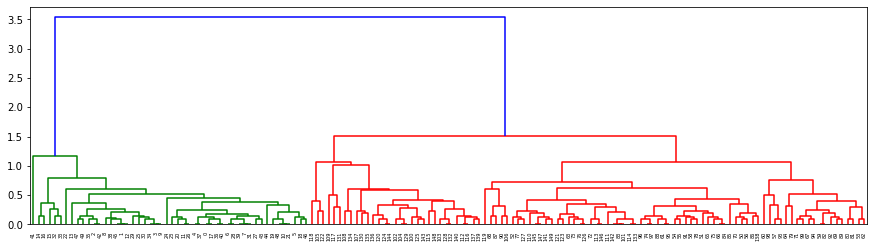

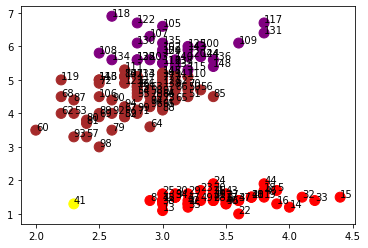

In [7]:
Znew, cluster_new = try_and_display_clustering(dnew, "average", num_clusters=4)
print(crosstab(cluster_new, y, rownames=['cl'], colnames=['y']))

5  clusters with method  average  and distance metric  euclidean
y    0   1   2
cl            
1   49   0   0
2    1   0   0
3    0   0  31
4    0  31  19
5    0  19   0


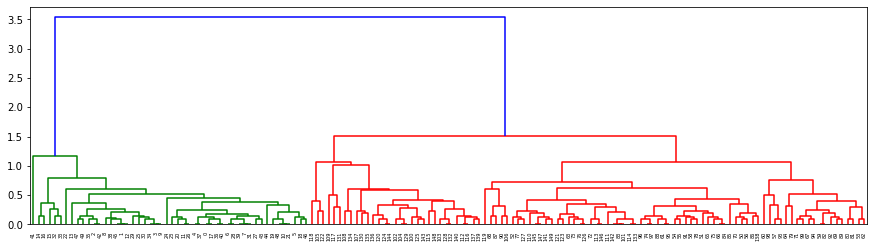

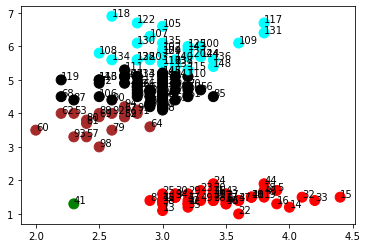

In [8]:
Znew, cluster_new = try_and_display_clustering(dnew, "average", num_clusters=5)
print(crosstab(cluster_new, y, rownames=['cl'], colnames=['y']))

Adding more clusters doesn't seem to improve the problem of the second and third categories being mixed together, and it starts splitting up the categories into more clusters.

**Question 5**. Cross-tabulate results are useful for figuring out the quality of clustering. You task is to propose a formula that uses the result of cross-tabulation to come up with a single number that measures the success of clustering. Please jsutify why you selected the formula.

When a row has numbers in multiple columns, that means that that row's cluster contains cases which actually belong to different categories. This is, of course, undesirable.
Also, when a column (i.e. category) has numbers in multiple rows, that means that that column's category is split across multiple clusters.

As for a clustering-evaluation formula:
For a clustering C of some data, let the matrix of its crosstab be CT.
Also, let the quantity column_cost(col_i) for some column col_i of CT be the quantity of non-zero values in that column times the product of all of the non-zero values in that column.
Similarly, let the quantity row_cost(row_i) for some row row_i of CT be the quantity of non-zero values in that row times the product of all of the non-zero values in that row.
Then, let SPLIT_COST be a hyperparameter of the formula, which determines how heavily to penalize splitting a category across multiple clusters.
Likewise, let MIX_COST be a hyperparameter of the formula, which determines how heavily to penalize lumping together cases from multiple categories into a single cluster.

Finally, the formula is:
COST = - SPLIT_COST * SUM(column_cost(col_i), col_i= each column in CT) - MIX_COST * SUM(row_cost(row_i), row_i=each row in CT)
The overall cost of the clustering would be less negative if it was better and more negative if it was worse.

The column cost captures how much a category's cases are split across clusters because the product of the subdivisions of a number (i.e. the total number of cases in the category) will generally greater if the number is split into more non-1 subdivisions (i.e. if the cases of the category are split across more clusters).
The product of all of the non-zero entries is multiplied by the quantity of non-zero entries to guard against the situation where some cases of the category are each alone in a different cluster from all of the other cases of that category (because otherwise those cases wouldn't be contributing to the cost).

The row cost captures how many cases from different categories are lumped into a cluster together because the product of the subdivisions of a number (i.e. the total number of cases in a cluster) will generally greater if the number is split into more non-1 subdivisions (i.e. if those cases are coming from more different categories).
Also, that cost roughly scales with the number of cases from different categories that are lumped together into a single cluster.
The product of all of the non-zero entries is multiplied by the quantity of non-zero entries to guard against the situation where some cases in the cluster are the only case of their category in the cluster (because otherwise those cases wouldn't be contributing to the cost).


**Question 6**. Repeat the clustering on the original Iris data, which has 4 attributes. Plot the scatter plot of the resulting clustering (remember, you can pick to see only 2 of the dimensions). Alternativelly, do SVD to project your data to 2 dimensionas and again plot the scatter plot. Take a look at the cross-tabulation. Try different clustering parameters and try to find the best clustering. Decide which choice of the parameters gives you the best results. Report on your findings with justifications for your conclusion.

3  clusters with method  average  and distance metric  euclidean
y    0   1   2
cl            
1   50   0   0
2    0   0  36
3    0  50  14


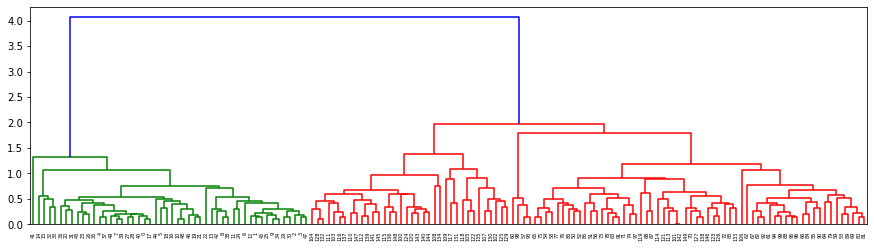

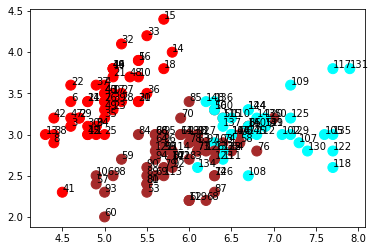

In [21]:
from numpy import linalg

Zfull, cluster_full = try_and_display_clustering(d, "average", num_clusters=3)
print(crosstab(cluster_full, y, rownames=['cl'], colnames=['y']))

3  clusters with method  weighted  and distance metric  euclidean
y    0   1   2
cl            
1   50   0   0
2    0   0  35
3    0  50  15


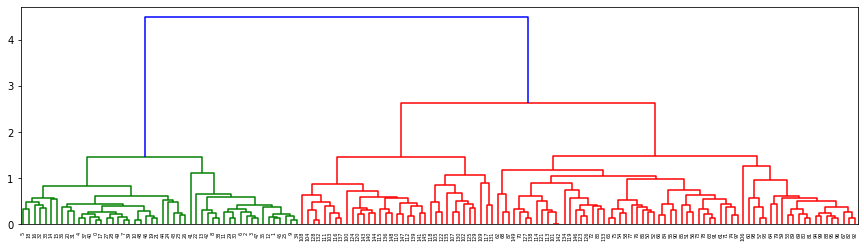

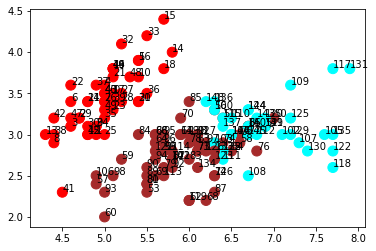

In [22]:
Zfull, cluster_full = try_and_display_clustering(d, "weighted", num_clusters=3)
print(crosstab(cluster_full, y, rownames=['cl'], colnames=['y']))

3  clusters with method  average  and distance metric  chebyshev
y    0   1   2
cl            
1   50   0   0
2    0   0  10
3    0  50  40


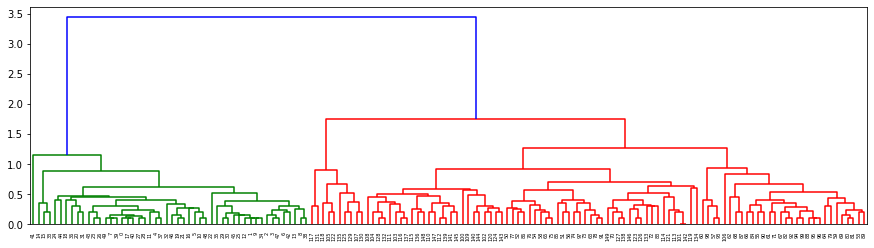

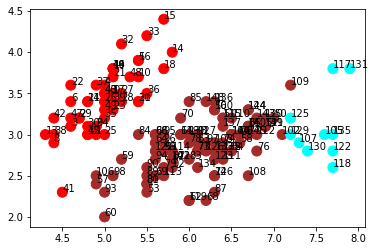

In [23]:
Zfull, cluster_full = try_and_display_clustering(d, "average", test_metric="chebyshev", num_clusters=3)
print(crosstab(cluster_full, y, rownames=['cl'], colnames=['y']))

3  clusters with method  weighted  and distance metric  chebyshev
y    0   1   2
cl            
1   50   0   0
2    0   0  17
3    0  50  33


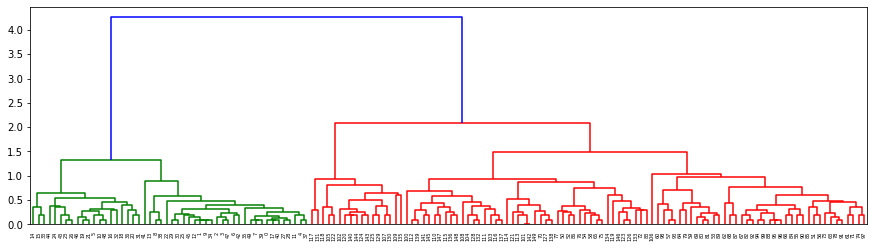

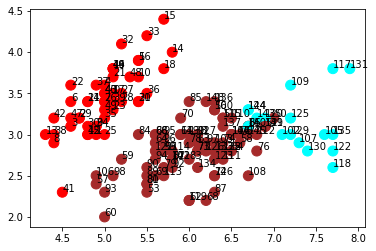

In [24]:
Zfull, cluster_full = try_and_display_clustering(d, "weighted", test_metric="chebyshev", num_clusters=3)
print(crosstab(cluster_full, y, rownames=['cl'], colnames=['y']))

In [25]:
u_full, s_full, vh_full = linalg.svd(d)
# print("\nu", u_full, "s", s_full, "v", vh_full, sep="\n")
# print("d shape: ", d.shape, "\t u shape: ", u_full.shape)
u_2col= u_full[:, 0:2]
# print("2 cols of u, shape of ", u_2col.shape, "\n", u_2col)
s_2matrix = np.diag(s_full[0:2])

dv_k2 = (u_2col.dot(s_2matrix))

3  clusters with method  average  and distance metric  euclidean
y    0   1   2
cl            
1   50   0   0
2    0   0   9
3    0  50  41


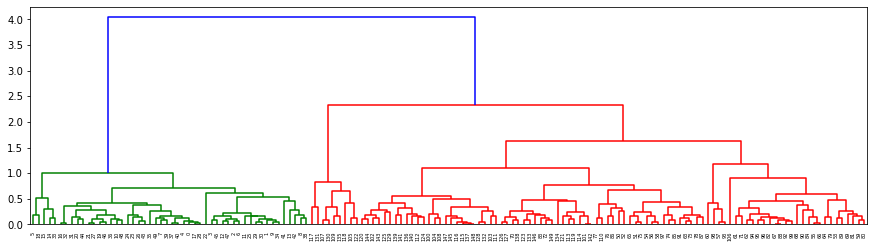

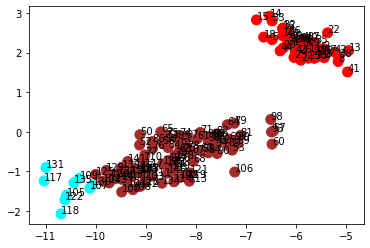

In [26]:
Z_k2, cluster_k2 = try_and_display_clustering(dv_k2, "average", num_clusters=3)
print(crosstab(cluster_k2, y, rownames=['cl'], colnames=['y']))

3  clusters with method  weighted  and distance metric  euclidean
y    0   1   2
cl            
1   50   0   0
2    0   1  31
3    0  49  19


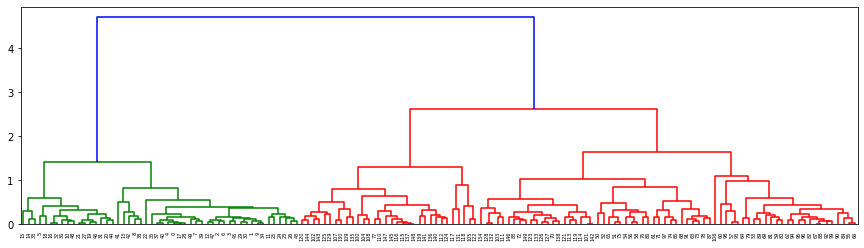

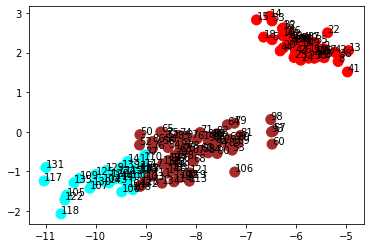

In [27]:
Z_k2, cluster_k2 = try_and_display_clustering(dv_k2, "weighted", num_clusters=3)
print(crosstab(cluster_k2, y, rownames=['cl'], colnames=['y']))

3  clusters with method  average  and distance metric  chebyshev
y    0   1   2
cl            
1    0  46  50
2    0   4   0
3   50   0   0


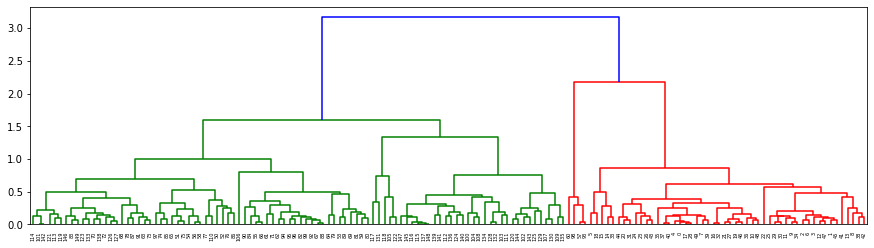

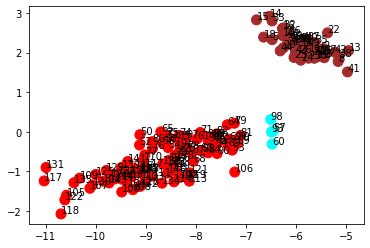

In [28]:
Z_k2, cluster_k2 = try_and_display_clustering(dv_k2, "average", test_metric="chebyshev", num_clusters=3)
print(crosstab(cluster_k2, y, rownames=['cl'], colnames=['y']))

3  clusters with method  weighted  and distance metric  chebyshev
y    0   1   2
cl            
1   50   0   0
2    0   0  15
3    0  50  35


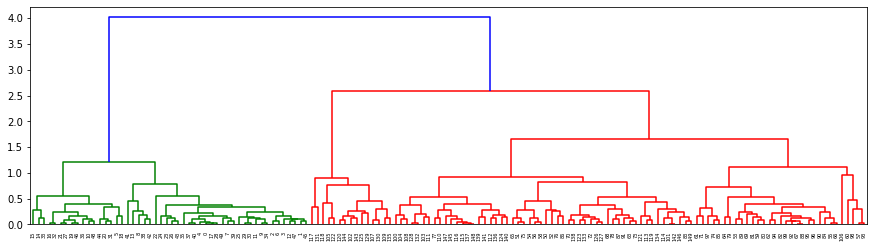

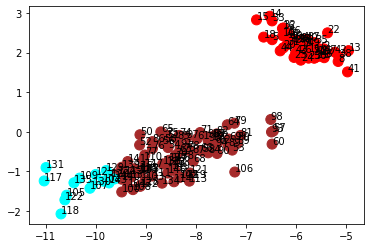

In [29]:
Z_k2, cluster_k2 = try_and_display_clustering(dv_k2, "weighted", test_metric="chebyshev", num_clusters=3)
print(crosstab(cluster_k2, y, rownames=['cl'], colnames=['y']))

Using all four attributes only slightly improves the clustering's cross tab results (only 14 instead of 19 cases of the 3rd category being lumped into the 2nd category's cluster).

Just using the first two columns produced by svd dimensionality reduction yields clusterings with much worse crosstab results (basically, large fractions or even majorities of the cases of the 3rd category being misclustered as being in the same cluster as the cases of the second category).

I obtained the best results using the average linkage algorithm and the euclidean distance metric. 
In particular, the chebyshev distance metric produce horrible results, lumping most of the 3rd category's cases in with the second category's cases. 

## K-Means Clustering

K-means clustering is another clustering algorithm (we will cover it in class tomorrow). It still receives a data set as an input, as well as the desired number of clusters, and outputs the assignment of data points to clusters.

Let us illustrate how to use k-means on the iris data.

In [3]:
dnew = d[:,1:3]

In [9]:
def try_and_eval_kmeans(data, labels, num_clusters, colors, rand_state=0, should_graph=True):
    # the following command results in creating of 2 clusters of `dnew` data
    kmeans = KMeans(n_clusters=num_clusters, random_state=rand_state).fit(data)
    # cl are the assignments of points to one of the 5 clusters
    cl=kmeans.labels_
    # cen are the centers of the 5 clusters, obtained by finding the average of all examples assigned to the clusters
    cen=kmeans.cluster_centers_
    if should_graph:
        # plot the results
        plt.figure()
        plt.scatter(data[:,0],data[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
        plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
        plt.axis('equal')
    
    # cross-tabulation with the flower types
    print(crosstab(cl, labels, rownames=['cl'], colnames=['y']))

y    0   1   2
cl            
0   15   0   0
1    0  28   0
2    0  22  20
3    0   0  30
4   35   0   0


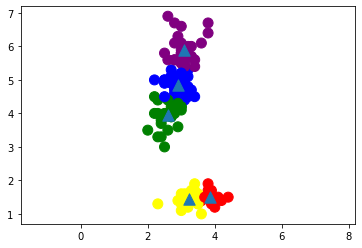

In [4]:
try_and_eval_kmeans(dnew, y, 5, ['red','green','blue','purple','yellow'])

y    0   1   2
cl            
0   16   0   0
1    0  22  20
2    0  28   0
3    0   0  30
4   34   0   0


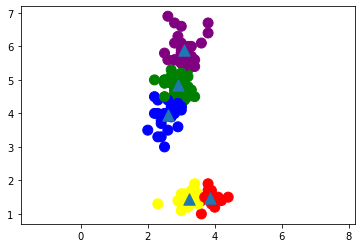

In [5]:
try_and_eval_kmeans(dnew, y, 5, ['red','green','blue','purple','yellow'], 57)

y    0   1   2
cl            
0    0  22  20
1   35   0   0
2    0  28   0
3   15   0   0
4    0   0  30


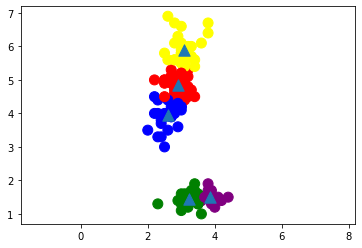

In [6]:
try_and_eval_kmeans(dnew, y, 5, ['red','green','blue','purple','yellow'], 32)

**Question 7**. Discuss on the quality of outcome of k-means clustering

The 5 cluster output of k-means clustering is mediocre- it lumps about 40% of category 2's cases together with ~40% of category 3's cases.
Also, while it doesn't mix category 1's cases with other categories, it does split category 1's cases across 2 clusters (which is, of course, nearly unavoidable when k is markedly higher than the number of actual categories).

**Question 8**. Repeat k-means clustering, but this time change the number of clusters to 3. Discuss the results. Compare the results with the results of hierarchical clustering from **Question 4**.

y    0   1   2
cl            
0   50   0   0
1    0  48   9
2    0   2  41


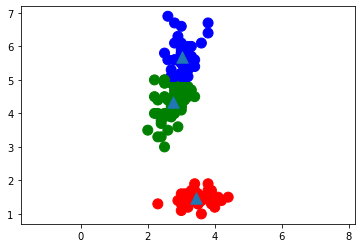

In [7]:
try_and_eval_kmeans(dnew, y, 3, ['red','green','blue'])

y    0   1   2
cl            
0    0   2  41
1   50   0   0
2    0  48   9


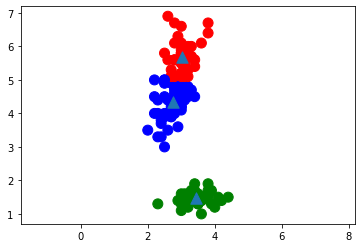

In [8]:
try_and_eval_kmeans(dnew, y, 3, ['red','green','blue'], 57)

y    0   1   2
cl            
0    0   2  41
1   50   0   0
2    0  48   9


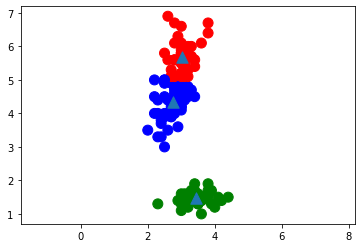

In [9]:
try_and_eval_kmeans(dnew, y, 3, ['red','green','blue'], 32)

This actually performs somewhat better than the hierarchical clustering on 2 columns of the dataset.
It only lumps 9 cases of category 3 into the second cluster and 2 cases of category 2 into the 3rd cluster, for a total of 11 mis-clustered cases.
Meanwhile, question 4's hierarchical clustering misclustered 14 cases.


**Question 9**. Repeat k-means clustering on the whole Iris data set, the same as you did in **Question 6**. Discuss your results and compare them to the hierarchical clustering results.

y    0   1   2
cl            
0    0   2  36
1   50   0   0
2    0  48  14


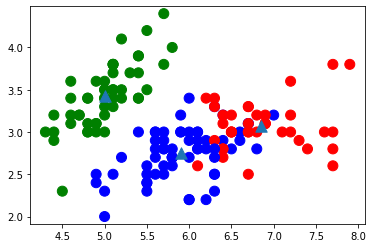

In [10]:
try_and_eval_kmeans(d, y, 3, ['red','green','blue'])

y    0   1   2
cl            
0    0  48  14
1   50   0   0
2    0   2  36


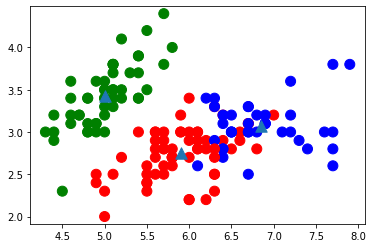

In [11]:
try_and_eval_kmeans(d, y, 3, ['red','green','blue'], 57)

y    0   1   2
cl            
0    0   2  36
1   50   0   0
2    0  48  14


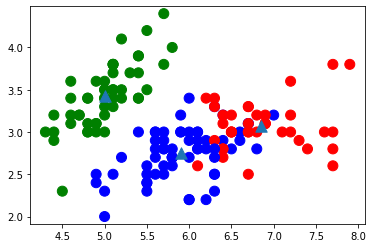

In [12]:
try_and_eval_kmeans(d, y, 3, ['red','green','blue'], 32)



Somehow, k-means clustering performed a bit worse, based on cross-tab results, when given all 4 columns than it did when given only 2 columns.
It lumped 14 cases of category 3 into the 3rd cluster (which was mostly cases of the second category) and lumped 2 cases of category 2 into the first cluster (which was mostly cases of the third category), for a total of 16 misclustered cases.

This is slightly worse than the hierarchical clustering using all 4 columns (which only misclustered 14 cases).


## Lab 9.B Document Clustering (50% of grade)

In this part of the lab assignment, you will apply your clustering knowledge on the Newsgroup data. The following is a list of questions.

1. Select $N = 100$ random documents and their types from the newsgroup data.
Use Google search to figure out how to do it in Python.
The reason we are doing this is that hierrchical clustering can be very slow on large data sets.

2. Find 3 clusters using deafult (single-link, Eucliedan distance) hierarchical clustering.
Use cross-tabulation to measure the quality of clustering.

3. Repeat step 2, by trying to find a better choice of parameters for hierarchical clustering.
Try the Jaccard or cosine distance instead of Eucliedean. Report on your findings

4. Repeat step 3, but this type use k-means clustering. Compare with the results from step 3.

5. Instead of $N = 100$, select $N= 200, 500, 1000, 2000, 5000$ random documents. Set number of clusters to 5.
Apply hierarchical and k-means clustering on such data and measure time. Discuss how does the time scale with $N$.
For k-means clustering, discuss how do the clusters centers change as the data size increases --
do you see some qualitative improvements in the quality of clustering?

### Newsgoups data

Download `documents.csv`, `newsgroup.csv`, `groupnames.csv`, `wordlist.csv` to your local folder. This data set is about 16,242 news articles. Each article is represented as a bag-of-word vector containing counts of 100 words from a dictionary. This is saved in `documents`. The dictionary words are represented in the `wordlist`. Each document belongs to one of the 4 types of articles, listed in `groupnames`. We know the assignment of each document to one of those groups based on `newsgroup` values.

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from pandas import crosstab
from pandas.plotting import scatter_matrix
import pandas as pd
import random
%matplotlib inline

In [3]:

wordlist = np.loadtxt('wordlist.csv', delimiter=",",dtype='str')
documents = np.loadtxt('documents.csv', delimiter=",",dtype='int')
documents = np.transpose(documents)
newsgroup = np.loadtxt('newsgroup.csv', delimiter=",",dtype='int')
groupnames = np.loadtxt('groupnames.csv', delimiter=",",dtype='str')

In [4]:
print(wordlist.shape)
print(documents.shape)
print(groupnames)
print(newsgroup.shape)

(100,)
(16242, 100)
['comp.*' 'rec.*' 'sci.*' 'talk.*']
(16242,)


In [5]:
# 1. Select $N = 100$ random documents and their types from the newsgroup data.
# Use Google search to figure out how to do it in Python.
# The reason we are doing this is that hierrchical clustering can be very slow on large data sets
m= documents.shape[0]
indices = range(m)
sample100Indices = random.sample(indices, 100)

sample100Docs = documents[sample100Indices, :]
sample100Groups = newsgroup[sample100Indices]

print(sample100Docs, "\n", sample100Groups)




[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 
 [1 4 4 4 2 1 4 4 4 3 4 4 1 4 4 4 4 3 1 4 4 1 3 4 1 4 4 4 1 1 4 4 1 1 4 3 4
 3 4 3 1 4 2 2 4 1 3 4 3 4 1 3 1 4 2 4 1 2 4 4 1 4 3 1 1 3 4 3 2 2 4 1 3 4
 4 4 2 2 1 1 2 2 4 1 1 4 4 1 4 4 3 3 1 4 3 3 3 1 1 2]


In [6]:
# 2. Find 3 clusters using deafult (single-link, Eucliedan distance) hierarchical clustering.
# Use cross-tabulation to measure the quality of clustering.
Z_100 = hierarchy.linkage(sample100Docs,method = 'single', metric = 'euclidean')
doc100Clusters = hierarchy.fcluster(Z_100, 3, criterion='maxclust')
print(crosstab(doc100Clusters, sample100Groups, rownames=['cl'], colnames=['y']))





y    1   2   3   4
cl                
1   27  12  17  42
2    0   0   1   0
3    0   0   0   1


In [7]:
# 3. Repeat step 2, by trying to find a better choice of parameters for hierarchical clustering.
# Try the Jaccard or cosine distance instead of Eucliedean. Report on your findings
Z_100 = hierarchy.linkage(sample100Docs,method = 'average', metric = 'cosine')
doc100Clusters = hierarchy.fcluster(Z_100, 3, criterion='maxclust')
print(crosstab(doc100Clusters, sample100Groups, rownames=['cl'], colnames=['y']))
print("\n")
Z_100 = hierarchy.linkage(sample100Docs,method = 'average', metric = 'jaccard')
doc100Clusters = hierarchy.fcluster(Z_100, 3, criterion='maxclust')
print(crosstab(doc100Clusters, sample100Groups, rownames=['cl'], colnames=['y']))
print("\n")
Z_100 = hierarchy.linkage(sample100Docs,method = 'complete', metric = 'cosine')
doc100Clusters = hierarchy.fcluster(Z_100, 3, criterion='maxclust')
print(crosstab(doc100Clusters, sample100Groups, rownames=['cl'], colnames=['y']))
print("\n")
Z_100 = hierarchy.linkage(sample100Docs,method = 'complete', metric = 'jaccard')
doc100Clusters = hierarchy.fcluster(Z_100, 3, criterion='maxclust')
print(crosstab(doc100Clusters, sample100Groups, rownames=['cl'], colnames=['y']))
print("\n")
Z_100 = hierarchy.linkage(sample100Docs,method = 'weighted', metric = 'cosine')
doc100Clusters = hierarchy.fcluster(Z_100, 3, criterion='maxclust')
print(crosstab(doc100Clusters, sample100Groups, rownames=['cl'], colnames=['y']))
print("\n")
Z_100 = hierarchy.linkage(sample100Docs,method = 'weighted', metric = 'jaccard')
doc100Clusters = hierarchy.fcluster(Z_100, 3, criterion='maxclust')
print(crosstab(doc100Clusters, sample100Groups, rownames=['cl'], colnames=['y']))
print("\n")
Z_100 = hierarchy.linkage(sample100Docs,method = 'weighted', metric = 'euclidean')
doc100Clusters = hierarchy.fcluster(Z_100, 3, criterion='maxclust')
print(crosstab(doc100Clusters, sample100Groups, rownames=['cl'], colnames=['y']))

y    1   2   3   4
cl                
1    0   2   0   0
2   26  10  18  43
3    1   0   0   0


y    1   2   3   4
cl                
1    0   2   0   0
2   26  10  18  43
3    1   0   0   0


y    1   2   3   4
cl                
1   27  12  18  43


y    1   2   3   4
cl                
1   27  12  18  43


y    1  2   3   4
cl               
1    0  3   0   0
2   26  9  18  43
3    1  0   0   0


y    1  2   3   4
cl               
1    0  4   0   1
2   26  8  18  42
3    1  0   0   0


y    1   2   3   4
cl                
1   23  12  14  42
2    4   0   4   0
3    0   0   0   1


I was not able to produce a significantly better clustering with non-euclidean distance metrics like cosine and jaccard, even when I varied the linkage algorithm as well.
Incidentally, the 'complete' linkage algorithm failed miserably, not even managing to divide the dataset into the number of clusters requested (instead squishing them all together into a single cluster). 


y    1   2   3   4
cl                
0    0   0   0   1
1   27  12  18  32
2    0   0   0  10


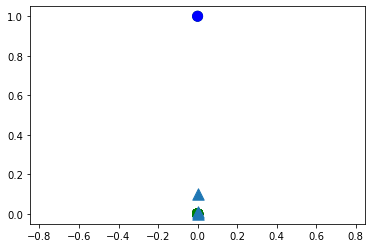

In [11]:
# 4. Repeat step 3, but this type use k-means clustering. Compare with the results from step 3.
try_and_eval_kmeans(sample100Docs, sample100Groups, 3, ['red','green','blue'])

K-means clustering performed very slightly better than hierarchical clustering on this very limited dataset, isolating a whole 10 cases of a category in their own cluster!
However, it was still a grotesque failure, combining almost all of the cases of all categories into a single cluster.

In [10]:
# 5. Instead of $N = 100$, select $N= 200, 500, 1000, 2000, 5000$ random documents. Set number of clusters to 5.
# Apply hierarchical and k-means clustering on such data and measure time. 
# Discuss how does the time scale with $N$.
# For k-means clustering, discuss how do the clusters centers change as the data size increases --
# do you see some qualitative improvements in the quality of clustering?
import time



numDocsOptions = [200,500,1000, 2000, 5000]

for numDocsOption in numDocsOptions:
    print("for " + str(numDocsOption) + " random documents:")
    sampleNIndices = random.sample(indices, numDocsOption)

    sampleNDocs = documents[sampleNIndices, :]
    sampleNGroups = newsgroup[sampleNIndices]

    hierarchStartTime = time.perf_counter()
    Z_N = hierarchy.linkage(sampleNDocs,method = 'average', metric = 'euclidean')
    docNClusters = hierarchy.fcluster(Z_N, 5, criterion='maxclust')
    print(crosstab(docNClusters, sampleNGroups, rownames=['cl'], colnames=['y']))
    hierarchDuration= time.perf_counter() - hierarchStartTime
    print("hierarchical clustering took " + str(hierarchDuration) + " time (in seconds)")


    kmeansStartTime = time.perf_counter()
    try_and_eval_kmeans(sampleNDocs, sampleNGroups, 5, ['red','green','blue','purple','yellow'], should_graph=False)
    kmeansDuration = time.perf_counter() - kmeansStartTime
    print("k-means clustering took " + str(kmeansDuration) + " time (in seconds)")


for 200 random documents:
y    1   2   3   4
cl                
1   46  42  37  71
2    0   0   0   1
3    0   0   1   0
4    0   0   0   1
5    1   0   0   0
hierarchical clustering took 0.016113199999999495 time (in seconds)
y    1   2   3   4
cl                
0    1   0   1   0
1    1   5   2  13
2    1   1   3  16
3   44  36  32  36
4    0   0   0   8
k-means clustering took 0.05577329999999847 time (in seconds)
for 500 random documents:
y     1   2   3    4
cl                  
1     2   0   0    0
2   144  99  80  172
3     0   0   0    1
4     0   0   0    1
5     0   0   1    0
hierarchical clustering took 0.028454199999998764 time (in seconds)
y    1   2   3    4
cl                 
0   77  83  65  108
1   28  14   9    8
2    4   0   1    0
3    1   2   3   56
4   36   0   3    2
k-means clustering took 0.0848425000000006 time (in seconds)
for 1000 random documents:
y     1    2    3    4
cl                    
1   312  214  153  317
2     0    0    0    1
3     1    0    0

K-means clustering's time scaled roughly linearly with the size of the dataset.
Meanwhile, hierarchical clustering's time scaled markedly superlinearly with the dataset size.
This is most painfully obvious in the jump between 2000 documents in 0.29748 seconds and 5000 documents in 1.863449 seconds.
The number of documents increased by a factor of 2.5, and the hierarchical clustering running time more than sextupled.


The k-means clustering seems to improve somewhat as the dataset grows, slowly putting smaller and smaller majorities of all cases into the same cluster (so eventually it might start actually correctly dividing most of the cases into separate clusters rather than having a supercluster).




